# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify images as cats or dogs

## Learning Objectives

At the end of the experiment, you will be able to :

* Load and prepare images for the model using Pytorch
* Develop a CNN model and improve model performance

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/Pytorch_CNN_cats_and_dogs.mp4" type="video/mp4">
</video>
""")

## Dataset

The Dogs and Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. The train folder contains ~22k images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains ~2k images, named according to a numeric id.

## Grading = 10 Marks

## Setup Steps

In [ ]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="U3_MH1_CNN_with_Pytorch" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Cat_Dog_data_B17.zip")
   ipython.magic("sx unzip -qq Cat_Dog_data_B17.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


In [ ]:
ls

Cat_Dog_data/  Cat_Dog_data_B17.zip  Cat_Dog_data_B17.zip.1  sample_data/


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [ ]:
# Import Libraries
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

## **Stage 1:** Define Transformations and import data

### 1 Marks - > Compose multiple transformations with the following conditions

1. Transform image size to 128 by using Resize()

2. Convert image to Grayscale

3. Transform the image into a number using tensor

4. Normalize the tensor image with 0.5

[Hint](https://pytorch.org/vision/stable/transforms.html)

In [ ]:

transformations = transforms.Compose([
    transforms.Resize((128, 128)),   # Resize to 128x128
    transforms.Grayscale(),          # Convert to Grayscale
    transforms.ToTensor(),           # Convert to Tensor
    transforms.Normalize(0.5, 0.5)   # Normalize with mean 0.5 and std 0.5
])




### 1 Mark -> Load the dataset with the defined transformations

PyTorch includes a package called torchvision which is used to load and prepare the dataset. It includes two basic functions namely Dataset and DataLoader which helps in the transformation and loading of the dataset.

1. Dataset is used to read and transform a data point from the given dataset.  Note that, the data is not loaded on memory by now.

2. DataLoader is used to shuffle and batch the data. It can be used to load the data in parallel with multiprocessing workers. The Data loader reads the data and puts it into memory.



[Hint](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

In [ ]:
?torch.utils.data.DataLoader

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 100

train_set = datasets.ImageFolder('/content/Cat_Dog_data/train', transform = transformations)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_set=datasets.ImageFolder('/content/Cat_Dog_data/test', transform = transformations)
test_loader=DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [ ]:
train_set,train_loader

(Dataset ImageFolder
     Number of datapoints: 22550
     Root location: /content/Cat_Dog_data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
                Grayscale(num_output_channels=1)
                ToTensor()
                Normalize(mean=0.5, std=0.5)
            ),
 <torch.utils.data.dataloader.DataLoader at 0x7c72cd8d6b90>)

In [ ]:
test_set

Dataset ImageFolder
    Number of datapoints: 2045
    Root location: /content/Cat_Dog_data/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

### 1 Marks -> Plot the 5 images of Cats and 5 images of Dogs

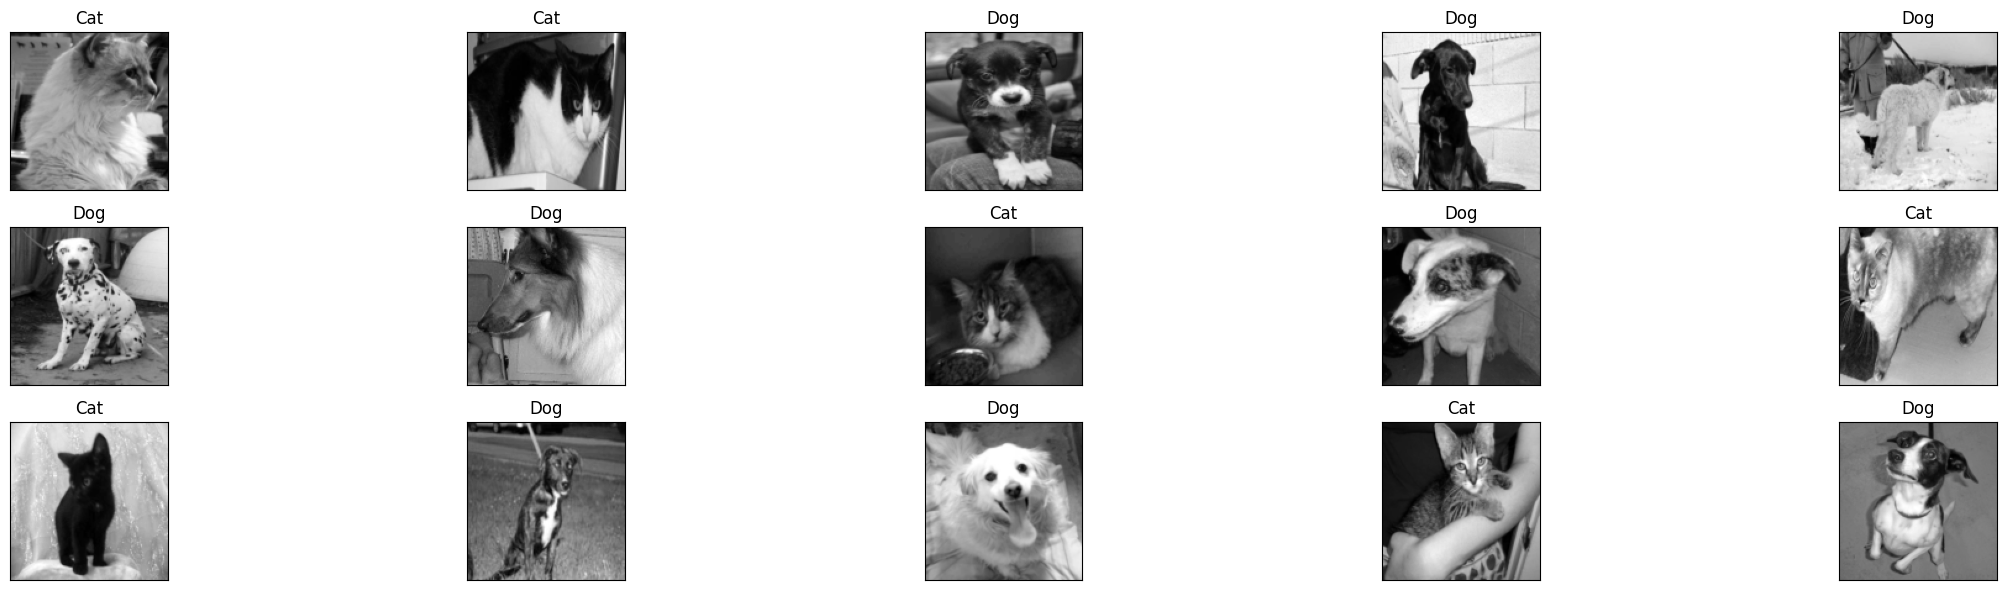

In [ ]:
import numpy as np
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

fig = plt.figure(figsize=(25, 6))

for idx in range(15):
    ax = fig.add_subplot(3, 5, idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    label = int(labels[idx])
    ax.set_title('Cat' if label == 0 else 'Dog')

plt.tight_layout()
plt.show()

## **Stage2:** CNN Model

Neural Networks are inherited from the nn.Module class.

Define a neural network by using two functions \__init__ and forward function.

1. In the \__init__  function, perform a series of convolutions and pooling operations to detect the features. Apply a fully connected layer on top of these features. Apply LogSoftmax at the output layer to improve the performance.

2. The forward function is called on the Neural Network which takes the inputs and passes through the different layers that have been defined in the \__init__.  The output of both convolution and pooling layers is 3D whereas a fully connected layer expects a 1D vector of numbers. So flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer.

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)



### 3 Marks -> Create CNN Model


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Sample Convolution Layer 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2) # output size of the first convolutional layer is 16*128*128
        self.bn1 = nn.BatchNorm2d(16)
        self.relu1 = nn.ReLU()
        # Sample Maxpool for the Convolutional Layer 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=4, stride=4) # Maxpooling reduces the size by kernel size. After Maxpooling the output size is 16*32*32


        # YOUR CODE HERE for defining more number of Convolutional layers with Maxpool as required (Hint: Use at least 3 convolutional layers for better performance)
        #Sample Convolution Layer 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.bn2 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()

        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=3)
        #Sample Convolution Layer 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        # YOUR CODE HERE for defining the Fully Connected Layer and also define LogSoftmax

        self.fc1 = nn.Linear(64 * 4 * 4, 256)  # Adjust input size based on previous layers' output
        self.fc2 = nn.Linear(256, 128)  # Add more fully connected layers as needed
        self.fc3 = nn.Linear(128, 10)  # Output layer, num_classes is the number of classes in your classification task


        self.logsoftmax = nn.LogSoftmax(dim=1)


    def forward(self, x):
        # Convolution Layer 1 and Maxpool
        out = self.cnn1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = self.cnn3(out)
        out = self.bn3(out)
        out = self.relu3(out)
        out = self.maxpool3(out)

        # YOUR CODE HERE for the Convolutional Layers and Maxpool based on the defined Convolutional layers
        out = out.view(-1,64 * 4 * 4)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)

        out = self.logsoftmax(out)

        return out






### 1 Mark -> Create an instance of the model and Declare the loss function and optimizer


In [ ]:
# To run the training on GPU
print(torch.cuda.is_available())

device  =  torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


In [ ]:
model = CNNModel()
model = model.to(device)
print(model)

#criterion = # YOUR CODE HERE : Explore and declare loss function
criterion = nn.CrossEntropyLoss()

#optimizer = # YOUR CODE HERE : Explore on the optimizer and define with the learning rate
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


CNNModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (lo

## **Stage 3:** Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

### Expected training accuracy is above 90%

### 2 Marks -> Iterate over images in the train_loader and perform the following steps.

1. First, we zero out the gradients using zero_grad()

2. We pass the data to the model. Convert the data to GPU before passing data  to the model

3. We calculate the loss using a Loss function

4. Perform Backward pass using backward() to update the weights

5. Optimize and predict by using the torch.max()

6. Calculate the accuracy of the train dataset

[Hint](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_convolutional_neuralnetwork/)

In [ ]:
iter = 0
num_epochs=20
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as tensors with gradient accumulation abilities
        images = images.requires_grad_()
        images = images.to(device)  # Move input to the same device as the model
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in train_loader:
                # Load images to tensors with gradient accumulation abilities
                images = images.requires_grad_()
                images = images.to(device)  # Move input to the same device as the model
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.5361102819442749. Accuracy: 77.9157485961914
Iteration: 1000. Loss: 0.3438880145549774. Accuracy: 82.88691711425781
Iteration: 1500. Loss: 0.3532993197441101. Accuracy: 84.1374740600586
Iteration: 2000. Loss: 0.25456252694129944. Accuracy: 86.57206726074219
Iteration: 2500. Loss: 0.3336254954338074. Accuracy: 88.08869171142578
Iteration: 3000. Loss: 0.29304179549217224. Accuracy: 87.46784973144531
Iteration: 3500. Loss: 0.2612465023994446. Accuracy: 88.78936004638672
Iteration: 4000. Loss: 0.21111619472503662. Accuracy: 87.0510025024414
Iteration: 4500. Loss: 0.183943971991539. Accuracy: 93.71175384521484


## **Stage 4:** Testing Evaluation for CNN model

### Expected performance of test evaluation is above 92%

### 1 Marks -> Evaluate model with the given test data

1. Transform and load the test images.

2. Pass the test data through the model (network) to get the outputs

3. Get the predictions from a maximum value using torch.max

4. Compare with the actual labels and get the count of the correct labels

5. Calculate the accuracy based on the count of correct labels

In [ ]:
val_set = datasets.ImageFolder('/content/Cat_Dog_data/test',transform = transformations)
test_loader=DataLoader(val_set, batch_size=batch_size, shuffle=True)


In [ ]:
model.eval()

correct_predictions = 0
total_samples = 0

# Evaluate the model on test data
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy
accuracy = (correct_predictions / total_samples) * 100
print('Test Accuracy: {:.2f}%'.format(accuracy))


Test Accuracy: 87.33%
